<a href="https://colab.research.google.com/github/Yash-Chandrani/Royal-AI/blob/master/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#import tensorflow as tf
import numpy as np 
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Dataset

In [28]:
dataset = pd.read_csv('/content/Insurance.csv')
df = dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Visualizations

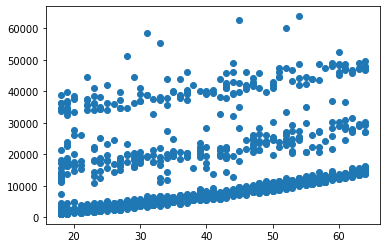

In [33]:
age = df["age"]
plt.scatter(age,charges)

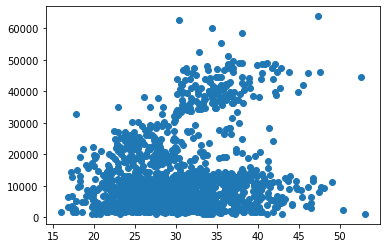

In [32]:
bmi = df["bmi"]
plt.scatter(bmi,charges)

In [30]:
smoker = list(df['smoker'])
smoker =list(map(lambda x:1 if x == "yes" else 0,smoker))
#plt.scatterplot)
charges = list(df["charges"])

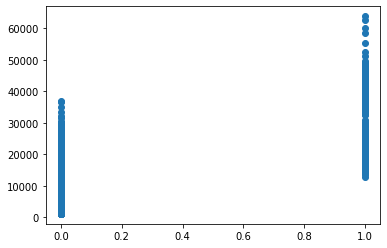

In [31]:
plt.scatter(smoker,charges)

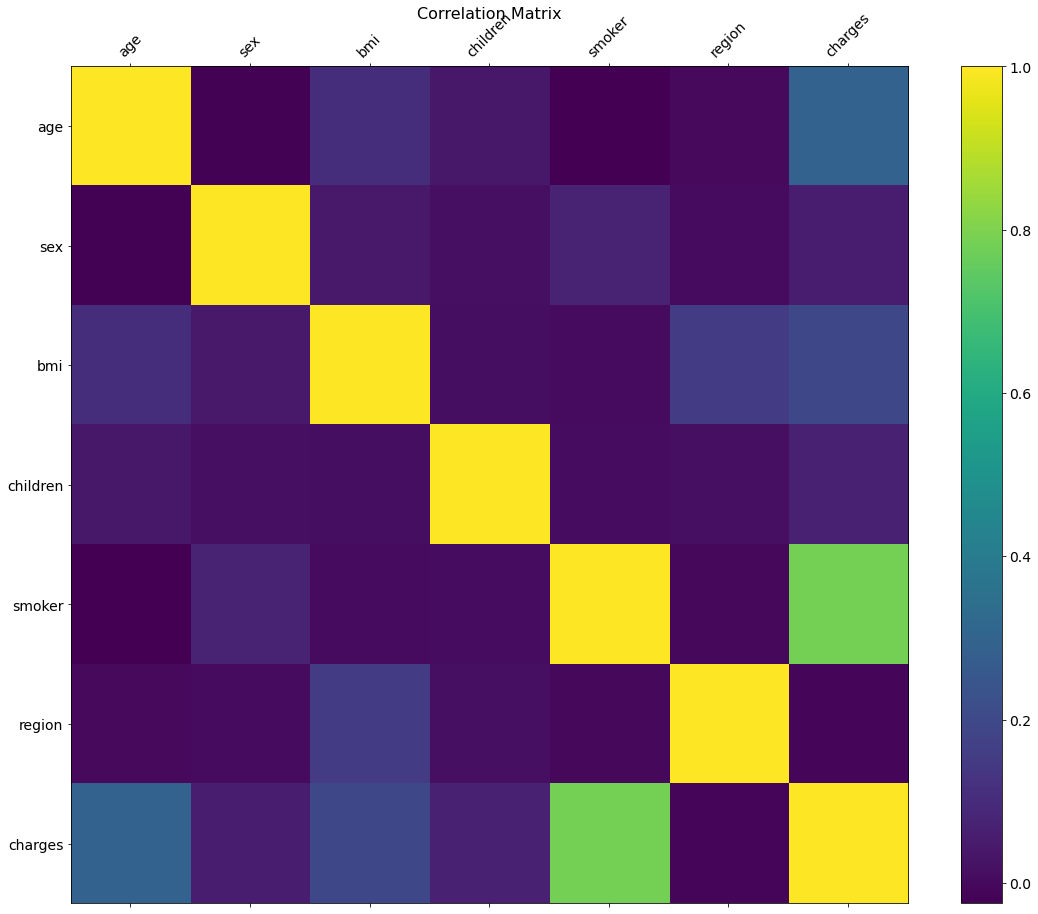

In [35]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#Encoding

In [34]:
X = dataset.iloc[:,1:6].values
y = dataset.iloc[:,6].values
z=dataset.iloc[2]

from sklearn.preprocessing import LabelEncoder

# importing one hot encoder from sklearn 
# There are changes in OneHotEncoder class 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# creating one hot encoder object with categorical feature 0 
# indicating the first column 


encoder = LabelEncoder()
gender=encoder.fit_transform(df['sex'])
smoker=encoder.fit_transform(df['smoker'])
region=encoder.fit_transform(df['region'])
df['smoker']=smoker
df['sex']=gender
df['region']=region
X = df[['age', 'sex', 'bmi', 'children','smoker','region']]
#y = df['charges']
columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(), [0])], remainder='passthrough') 
onehotencoder = OneHotEncoder()
X = np.array(columnTransformer.fit_transform(X))


#encoder = Encoder()
#y1 = encoder.fit_transform(z)
#df['sex'] = df['sex'].apply({'male':0,'female':1}.get) 
#df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
#df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
#df['sex']=array(df['sex'])
#gender = to_categorical(df['sex'])
#df['sex']=gender
#gender=encoder.fit_transform(df['sex'])
#smoker=encoder.fit_transform(df['smoker'])
#region=encoder.fit_transform(df['region'])
#print(gender)
#print(region)
print(X)
#print(y)
#df['smoker']=smoker
#df['sex']=sex
#df['region']=region
#X = dataset.iloc[:,1:6].values
#y = dataset.iloc[:,6].values
#X = df[['age', 'sex', 'bmi', 'children','smoker','region']]
#y = df['charges']
#print(y)
#Y = pd.get_dummies(y1).values
#print(y1)

  (0, 1)	1.0
  (0, 48)	27.9
  (0, 50)	1.0
  (0, 51)	3.0
  (1, 0)	1.0
  (1, 47)	1.0
  (1, 48)	33.77
  (1, 49)	1.0
  (1, 51)	2.0
  (2, 10)	1.0
  (2, 47)	1.0
  (2, 48)	33.0
  (2, 49)	3.0
  (2, 51)	2.0
  (3, 15)	1.0
  (3, 47)	1.0
  (3, 48)	22.705
  (3, 51)	1.0
  (4, 14)	1.0
  (4, 47)	1.0
  (4, 48)	28.88
  (4, 51)	1.0
  (5, 13)	1.0
  (5, 48)	25.74
  (5, 51)	2.0
  :	:
  (1330, 51)	2.0
  (1331, 5)	1.0
  (1331, 48)	33.4
  (1331, 51)	3.0
  (1332, 34)	1.0
  (1332, 48)	44.7
  (1332, 49)	3.0
  (1332, 51)	3.0
  (1333, 32)	1.0
  (1333, 47)	1.0
  (1333, 48)	30.97
  (1333, 49)	3.0
  (1333, 51)	1.0
  (1334, 0)	1.0
  (1334, 48)	31.92
  (1335, 0)	1.0
  (1335, 48)	36.85
  (1335, 51)	2.0
  (1336, 3)	1.0
  (1336, 48)	25.8
  (1336, 51)	3.0
  (1337, 43)	1.0
  (1337, 48)	29.07
  (1337, 50)	1.0
  (1337, 51)	1.0


#Training and testing

In [36]:
from sklearn.model_selection import train_test_split
#pd.get_dummies(train)   # gives (1451, 221)  
#pd.get_dummies(test)    # gives (1459, 206) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=2)
print(X_test)
#print(y)
#print(y_test)
#print(y_train)
#, gender_train,gender_test,smoker_train,smoker_test,region_train,region_test

TypeError: ignored

#Neural Architecture

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers  import SGD, Adam

from keras.models import Sequential
'''from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10, input_shape=(6,), activation='relu' ))
model.add(Activation('tanh'))
model.add(Dense(64,activation='tanh' ))
model.compile(loss='mean_absolute_error', optimizer='rmsprop',metrics=['accuracy'])'''


model = Sequential()
model.add(Dense(6, input_shape=(6,), activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(Adam(lr=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

#three_layer_model.add(Dense(output_dim=1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['accuracy'])
#model.compile(optimizer = 'rmsprop', loss = 'mean_absolute_error')
'''model.add(Dense(6, input_shape=(6,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.add(Dense(1, activation='softmax'))

model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])''' 

model.summary()
#model.fit(X_train, y_train, epochs=20, batch_size=16)
#score = model.evaluate(X_test, y_test, batch_size=16)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [38]:
print(X_train)
print("-----------")
#print(y_train)
#print(y_test)
#print(gender_train)
#print(smoker_train)
#print(region_train)

NameError: ignored

#Fitting

In [39]:
#three_layer_model.add(Dense(output_dim=1,activation='linear'))
model.fit(X_train, y_train, epochs=100)
#score = model.evaluate(X_test, y_test, batch_size=16)
'''model.fit(X_train, y_train,batch_size=2048,epochs = 100, validation_split= 0.2, verbose=0)
score = model.evaluate(X_test, y_test, batch_size=2048)
print(score)'''
#model.fit(X_train,y_train,epochs = 100)
#y_pred=model.predict(X_test)
#y_pred=model.predict(X_test)

NameError: ignored